# Indian Creek, Ohio, Test#1

## Load *Streamlines* package

In [1]:
import streamlines

## Initiate *Streamlines* workflow

Choose the JSON parameters file we want to work with. The extension `.json` is automatically added.

In [2]:
JSON_parameters_file = 'IndianCreek_Test1'

Initialize streamline analysis.

In [3]:
sl = streamlines.run( parameters_file=JSON_parameters_file, \
                        do_geodata = False, \
                        do_preprocess = False, \
                        do_condition=True, \
                        do_trace = False, \
                        do_analysis=False, \
                        do_mapping=False, \
                        do_plot=False, \
                        do_display=True, \
                        do_save=False )


Mon 2018-08-27 16:12:31 JST+0900

**Initialization begin**
Loaded JSON parameters file "/Users/colinstark/Work/Streamlines_notgit/slm/tests/IndianCreek_Test1.json"
slm git:
[['commit 12f034cb4b8e3b33e97e86ed12c17042c922d4fa',
  'Merge: b330b67 f29329f',
  'Author: Colin Stark <cstarknyc@gmail.com>',
  "    Merge branch 'master' of https://github.com/cstarknyc/slm"]]
**Initialization end**



## Import DTM

In [4]:
sl.geodata.do()


**Geodata begin**
/Users/colinstark/Work/Streamlines_notgit/slm/tests
.. data
Reading DTM from GeoTIFF file "/Users/colinstark/Work/Streamlines_notgit/slm/data/IndianCreek_res1m_fillsinks0p01_cuttest2.tif"
(361338.4063, 1.0, 0.0, 4290720.0, 0.0, -1.0)
DTM size: 200 x 200 = 40,000 pixels
DTM pixel size: 1.0m
DTM origin:
  - bottom-left pixel center: [361338.41mE, 4290520.00mN]
  - bottom-left pixel corner: [361337.91mE, 4290519.50mN]
ROI pixel bounds:  [[115, 129], [65, 79]]
ROI pixel grid:  15 x 15 = 225 pixels
ROI pixel-edge boundaries (assuming pixel-as-area)
  - in pixel units: [x: 115.0<=>130.0] , [y: 65.0<=>80.0]
  - in meters:      [x: 115.0<=>130.0] , [y: 65.0<=>80.0]
**Geodata end**



ERROR 1: NUMPY driver was compiled against GDAL 2.2, but the current library version is 2.4


Recording figure "roi_shaded_relief"


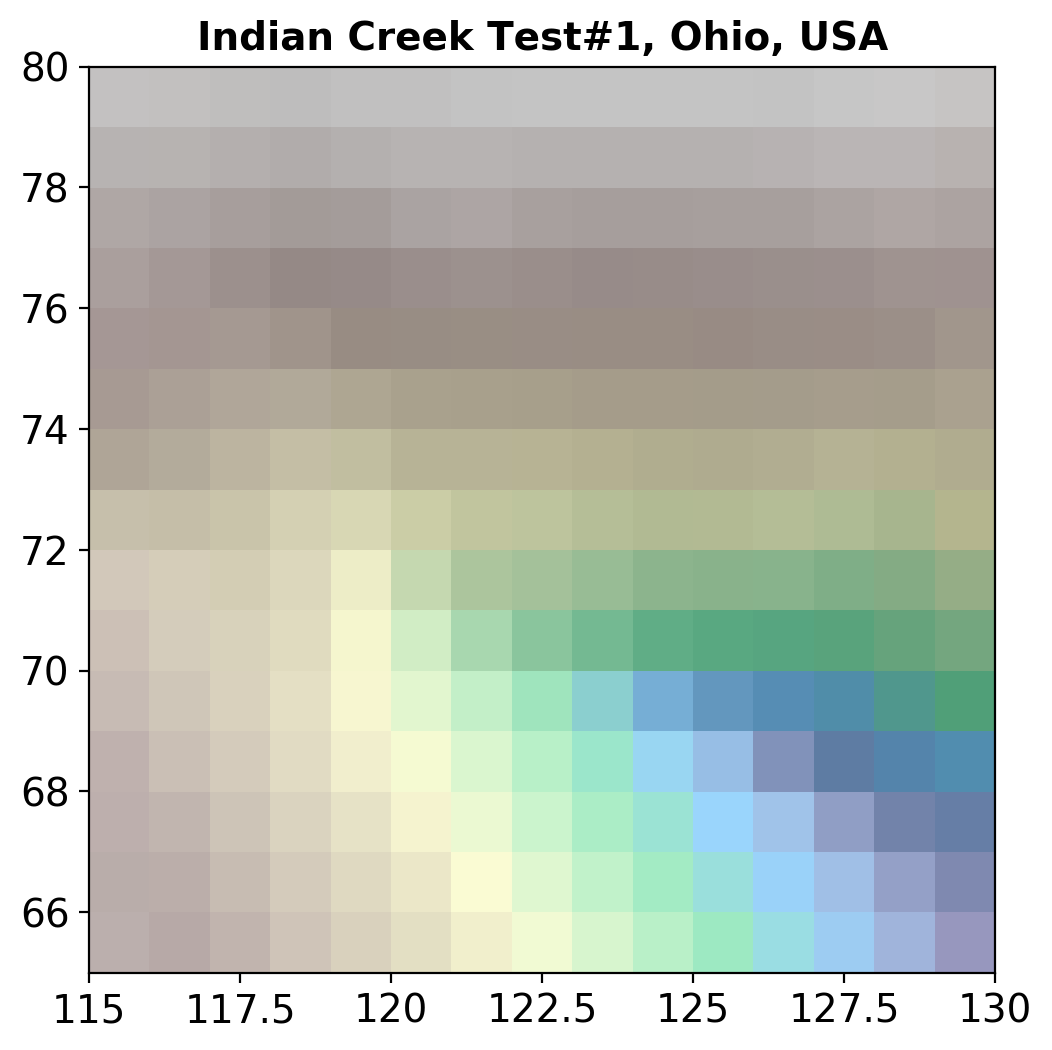

In [5]:
wsf=2
sl.plot.plot_roi_shaded_relief(interp_method='none',window_size_factor=wsf)

## Preprocess DTM (fix loops etc)

In [6]:
sl.preprocess.do()


**Preprocess begin**
Precondition gradient vector field by fixing loops & blockages
Finding blockages...found 2...done
Finding and fixing loops...
...done
Fixing blockages...
...done
Mask out bad uv pixels...done
**Preprocess end**



Recording figure "classical_streamlines_and_vectors"


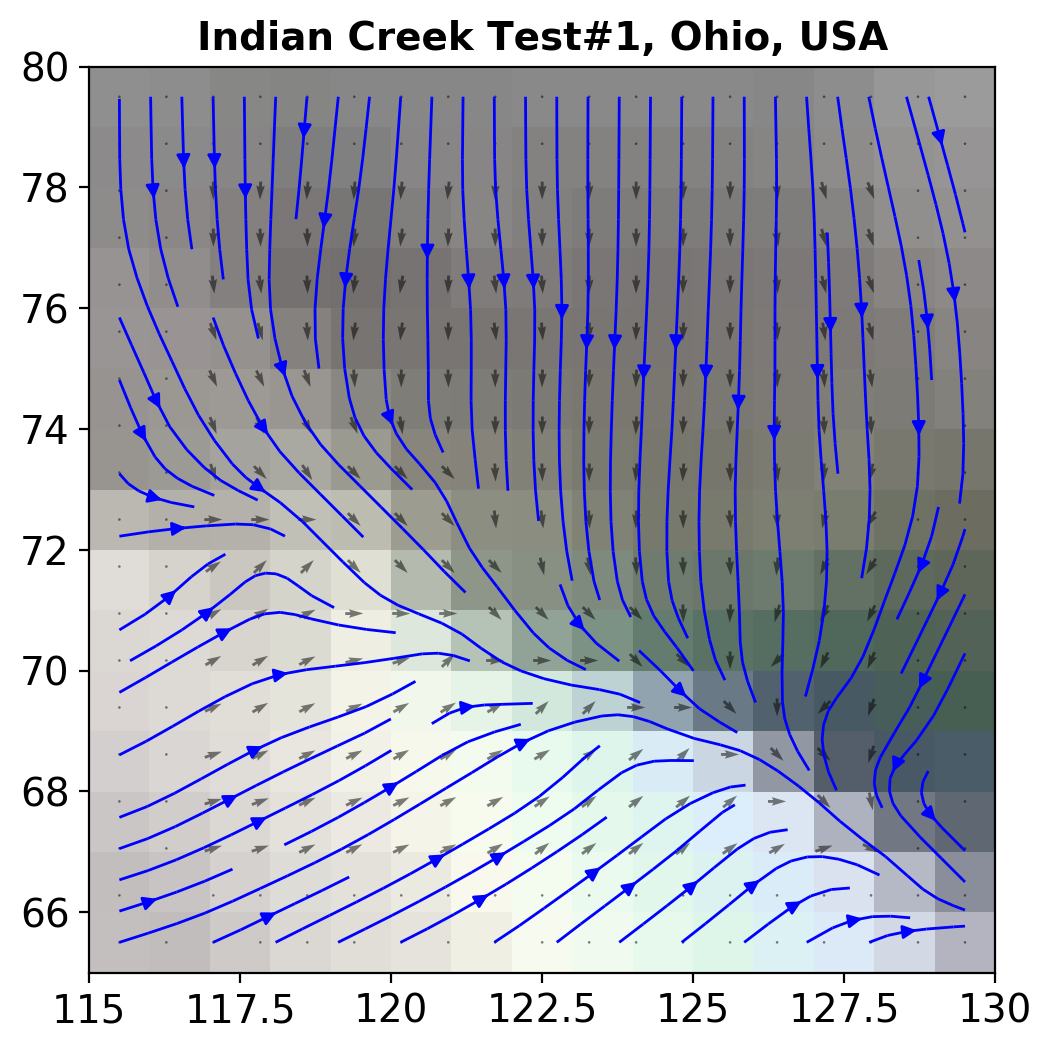

In [7]:
sl.plot.plot_classical_streamlines_and_vectors(window_size_factor=wsf)

## Trace streamlines

In [8]:
%time sl.trace.do()


**Trace begin**
Integrating trajectories...
Generating seed points...shuffling...padding for 32 CL work items/group: 225->256...done
GPU/OpenCL device global memory limit for streamline trajectories: 3.6GB
GPU/OpenCL device memory required for streamline trajectories: 26kB => no need to chunkify
Total number of kernel instances: 256
Number of chunks = seed point array divisor: 1
Chunk size = number of kernel instances per chunk: 256
Downstream: downup=0 sgn(uv)=+1.0 chunk=0 seeds: 0+225 => 225
Seed point buffer size = 225.0*8 bytes
0.0% 100.0% 
Upstream:   downup=1 sgn(uv)=-1.0 chunk=0 seeds: 0+225 => 225
Seed point buffer size = 225.0*8 bytes
0.0% 100.0% 
Building streamlines compressed array
Streamlines actual array allocation:  size=8kB
Computing streamlines statistics
   downstream                        upstream                     
          min       mean        max       min      mean        max
l    0.534559  12.083708  21.973553  1.398214  4.858229  12.809808
n    2.000000  

In [9]:
# import pandas as pd
# ddf=pd.DataFrame(sl.trace.traj_stats_df.loc['downstream'].T)
# udf=pd.DataFrame(sl.trace.traj_stats_df.loc['upstream'].T)
# ddf.style.format("{:.2g}").set_properties(**{'font-size':'12pt'}).set_caption('Downstreamline statistics:')
# udf.style.format("{:.2g}").set_properties(**{'font-size':'12pt'}).set_caption('Upstreamline statistics:')

In [10]:
# import cProfile
# cProfile.run('sl.trace.do()')

In [11]:
# %load_ext line_profiler
# # %lprun -f sl.trace.integrate_trajectories sl.trace.do()
# %lprun -f sl.trace.perform_RungeKutta2_integration \
#    -T IndianCreekDemo1/IndianCreekDemo1_timings.txt sl.trace.do()

Plotting all 225 down streamlines
Progress: 10%...20%...29%...39%...49%...59%...68%...78%...88%...98%...
Plotting all 225 up streamlines
Progress: 10%...20%...29%...39%...49%...59%...68%...78%...88%...98%...
Recording figure "streamlines"


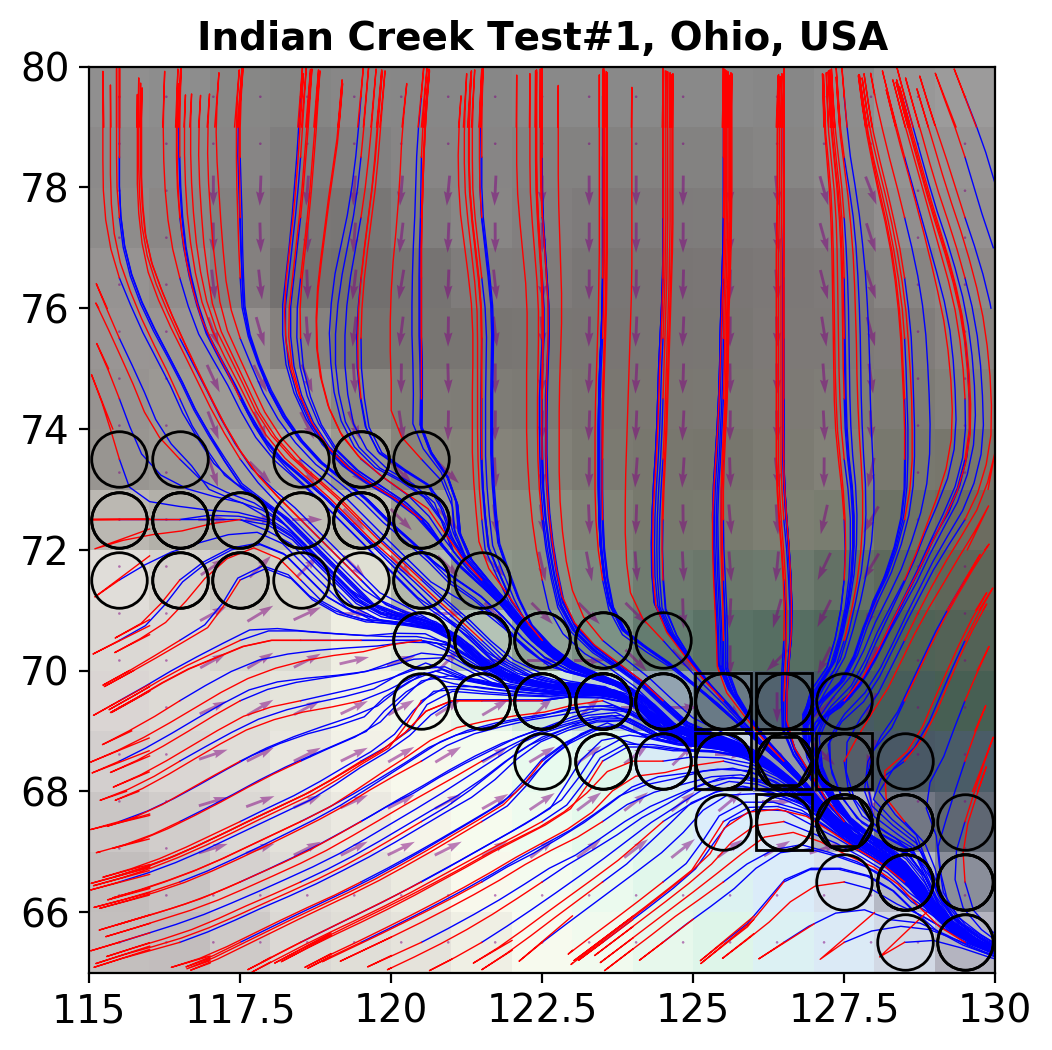

In [12]:
sl.plot.plot_streamlines(window_size_factor=wsf)

## Viz streamline flow concentrations

Recording figure "dsla"
Recording figure "dslt"


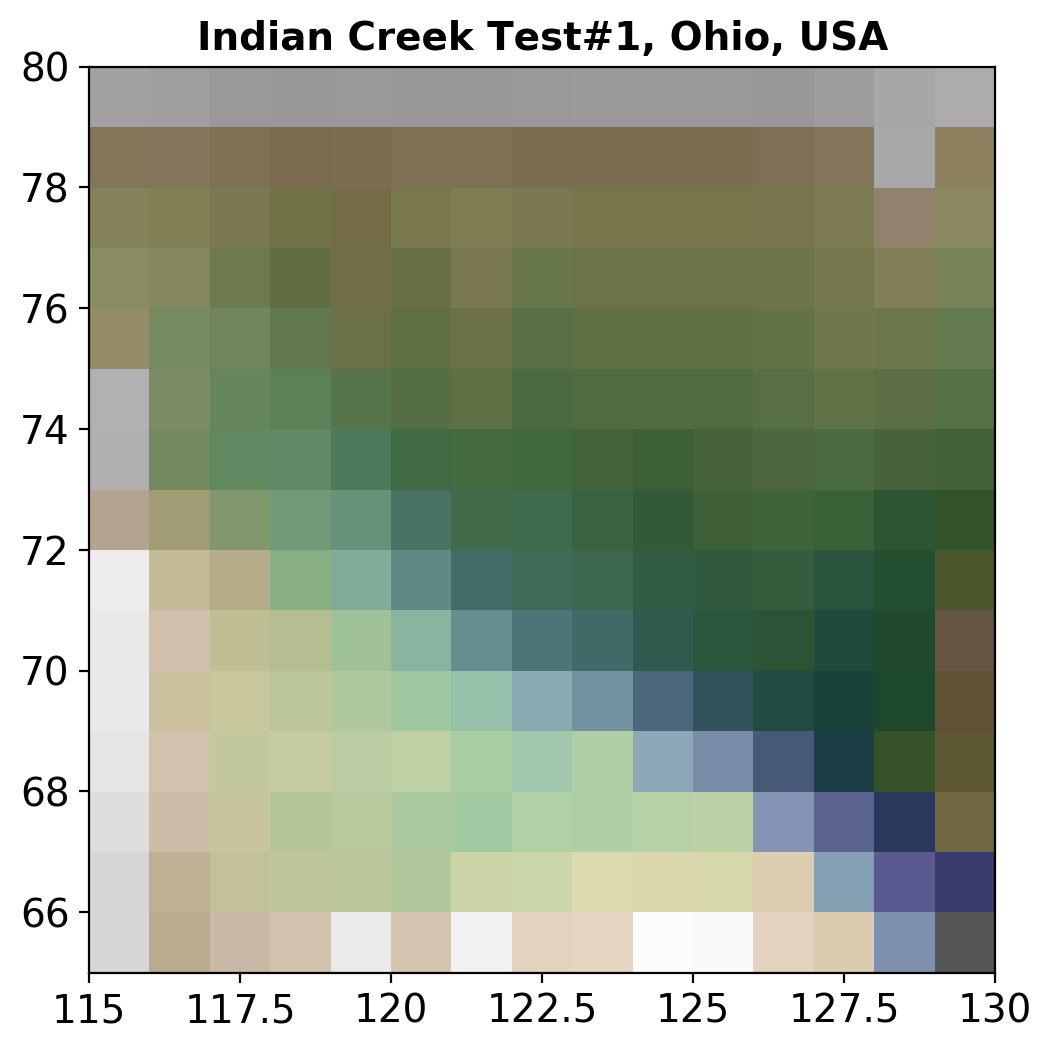

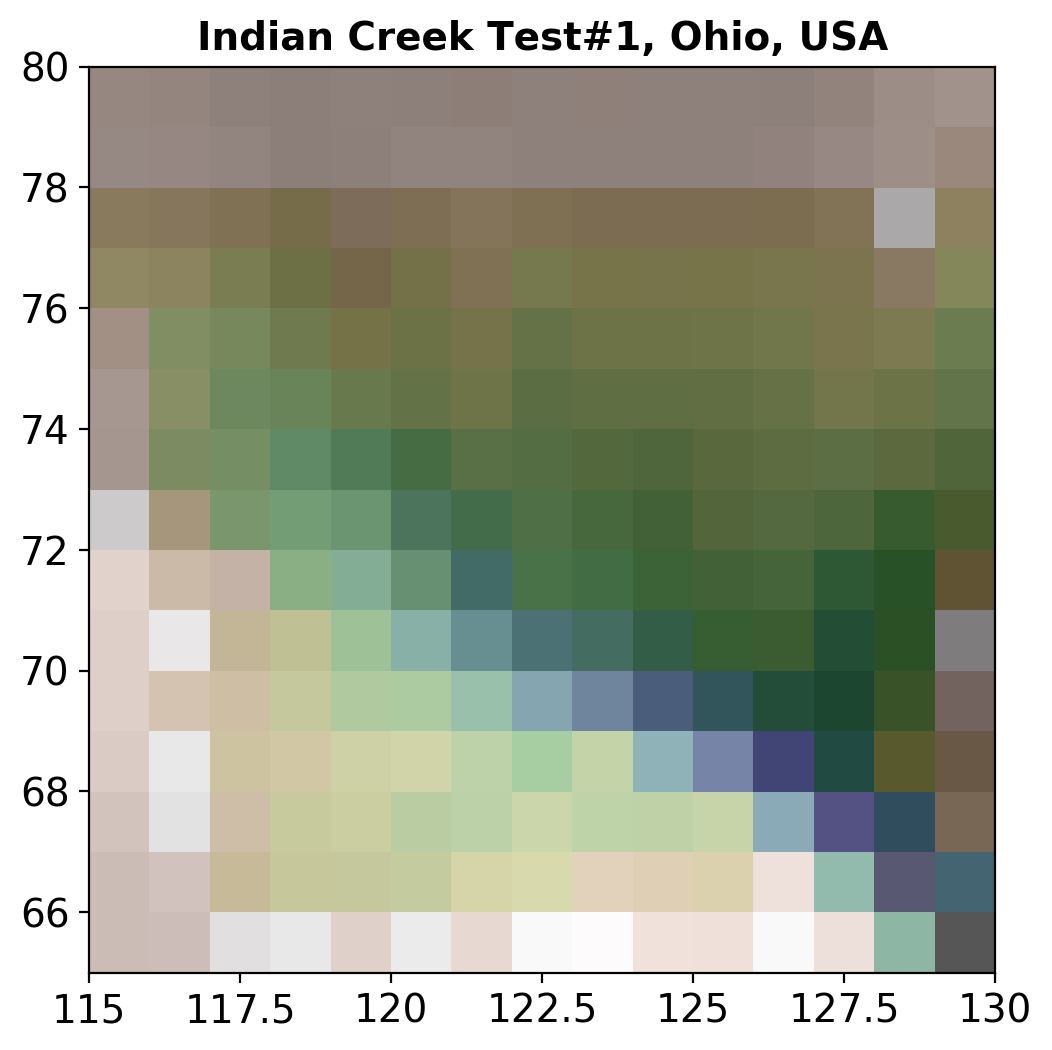

In [13]:
sl.plot.plot_flow_maps(window_size_factor=wsf)

## Analyze streamline distributions¶

In [14]:
sl.analysis.marginal_distbn_kde_bandwidth=10
sl.analysis.do()


**Analysis begin**
Kernel-density estimating marginal PDFs using "epanechnikov" kernels
Processing using "opencl" method


TypeError: compute_marginal_distribn_dsla() missing 1 required positional argument: 'data'

In [ ]:
sl.plot.plot_distributions(window_size_factor=wsf)

## Map channels, segments & hillslope lengths

In [ ]:
sl.mapping.do()

## Viz channels & segments

In [ ]:
sl.plot.plot_channels(window_size_factor=wsf)
sl.plot.plot_segments(window_size_factor=wsf)

## Viz hillslope lengths

In [ ]:
sl.plot.plot_hsl(cmap='jet',window_size_factor=wsf)

In [ ]:
sl.plot.plot_hsl_contoured(cmap='jet',window_size_factor=wsf)